domain
www.etfdailynews.com            16746
www.globenewswire.com            5423
economictimes.indiatimes.com     5310
www.globalsecurity.org           3119
www.forbes.com                   2784
timesofindia.indiatimes.com      2194
abcnews.go.com                   2058
www.businessinsider.com          2034
www.bbc.co.uk                    2032
punchng.com                      1800
Name: count, dtype: int64


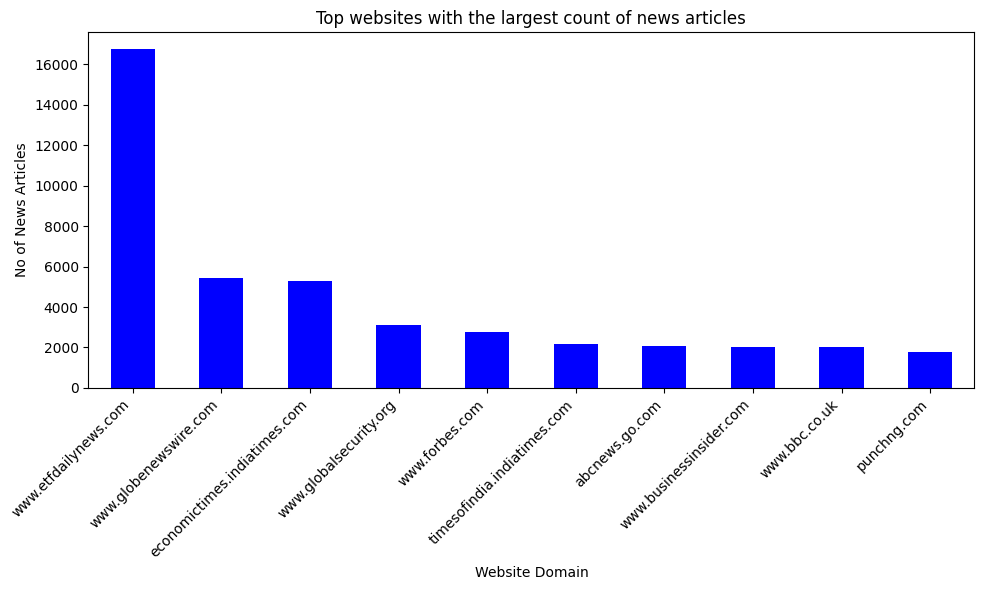

In [9]:
import sys, os
if os.path.abspath("..") not in sys.path:
    sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt

import src.utils as utils
from src.loader import NewsDataLoader

loader = NewsDataLoader()
news_data = loader.get_news_data()
traffic = loader.get_traffic_data()
domain = loader.get_domain_location_data()

top_websites = utils.find_top_websites(news_data)
print(top_websites)


#ploting the date ;;; hope this works
plt.figure(figsize=(10,6))
top_websites.plot(kind='bar',color='blue')
plt.title('Top websites with the largest count of news articles')
plt.xlabel('Website Domain')
plt.ylabel('No of News Articles')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()


In [43]:
# Get the top and bottom ten websites
top_ten_domain_locations = utils.find_top_ten_websites_traffic(traffic)

# Print top ten websites with highest traffic
print("Top Ten Websites with the Highest Traffic:")
print(top_ten_domain_locations)

Top Ten Websites with the Highest Traffic:
0              google.com
1            facebook.com
2             youtube.com
3             twitter.com
4           instagram.com
5            linkedin.com
6               apple.com
7           microsoft.com
8    googletagmanager.com
9           wikipedia.org
Name: Domain, dtype: object


In [44]:
# Get the top and bottom ten websites
top_ten_country_domain_counts = utils.find_top_country_with_domain_counts(data=news_data, domain=domain)

# Print top ten websites with highest traffic
print("Top Ten Websites with the Highest Number of News Media Organizations:")
print(top_ten_country_domain_counts)

Top Ten Websites with the Highest Number of News Media Organizations:
Country
United States    3896
Nigeria          1820
India            1176
Name: count, dtype: int64


In [45]:
# Get the top ten countries
top_ten_countries = utils.find_countries_with_many_articles(news_data, domain)

# Print 
print("Top ten Countries that have many articles written about them")
print(top_ten_countries)

Top ten Countries that have many articles written about them
category
Canada            2066
India             1054
Australia          877
United Kingdom     753
Ukraine            577
Mexico             553
United States      481
Nigeria            469
Germany            459
Hong Kong          430
Name: count, dtype: int64


In [46]:
# get the highest count of positive sentiment news articles
top_ten_highest_positive_sentiment = utils.find_highest_count_of_positive_sentiment(news_data)

# Print Top 10 Websites with the highest count of positive sentiment news articles
print("Top 10 Websites with the highest count of positive sentiment news articles:")
print(top_ten_highest_positive_sentiment)

Top 10 Websites with the highest count of positive sentiment news articles:
source_name
The Times of India    1145
ETF Daily News         992
GlobeNewswire          905
Forbes                 635
Digital Trends         406
Android Central        272
Business Insider       237
Boing Boing            170
Marketscreener.com     153
Phys.Org               143
Name: count, dtype: int64


In [47]:
# get the highest count of neutral sentiment news articles
top_ten_highest_neutral_sentiment = utils.find_highest_count_of_neutral_sentiment(news_data)

# Print Top 10 Websites with the highest count of neutral sentiment news articles
print("Top 10 Websites with the highest count of neutral sentiment news articles:")
print(top_ten_highest_neutral_sentiment)

Top 10 Websites with the highest count of neutral sentiment news articles:
source_name
ETF Daily News        15194
The Times of India     5149
GlobeNewswire          4491
Globalsecurity.org     2255
Forbes                 1933
The Punch              1229
ABC News               1193
BBC News               1185
Marketscreener.com     1167
Al Jazeera English      927
Name: count, dtype: int64


In [48]:
# get the highest count of negative sentiment news articles
top_ten_highest_negative_sentiment = utils.find_highest_count_of_negative_sentiment(news_data)

# Print Top 10 Websites with the highest count of negative sentiment news articles
print("Top 10 Websites with the highest count of negative sentiment news articles:")
print(top_ten_highest_negative_sentiment)

Top 10 Websites with the highest count of negative sentiment news articles:
source_name
The Times of India              1210
Business Insider                 890
BBC News                         854
Globalsecurity.org               747
ABC News                         726
Al Jazeera English               706
ETF Daily News                   560
The Punch                        455
RT                               403
International Business Times     319
Name: count, dtype: int64


In [4]:
# calculate the sentiment score of the title
news_data['sentiment_score'] = news_data['title'].apply(utils.get_sentiment_score)
# Calculate the average or median sentiment for each website
average_sentiment = news_data.groupby('source_name')['sentiment_score'].mean()  

print('Average Sentiment:', average_sentiment)

# or median sentiment
median_sentiment = news_data.groupby('source_name')['sentiment_score'].median()  

print('Median Sentiment:', median_sentiment)

Average Sentiment: source_name
ABC News                       -0.132417
Al Jazeera English             -0.205929
AllAfrica - Top Africa News    -0.236325
Android Central                 0.182132
BBC News                       -0.178398
Boing Boing                    -0.015541
Business Insider               -0.088534
CNA                             0.022517
CNN                            -0.128690
Deadline                        0.073536
Digital Trends                  0.200637
ETF Daily News                  0.169134
Euronews                       -0.138678
Forbes                          0.154829
Gizmodo.com                     0.002258
Globalsecurity.org             -0.057197
GlobeNewswire                   0.204151
International Business Times   -0.095655
Marketscreener.com              0.120894
NPR                            -0.054712
Phys.Org                        0.016818
RT                             -0.091136
ReadWrite                       0.084786
The Indian Express        

<Axes: >

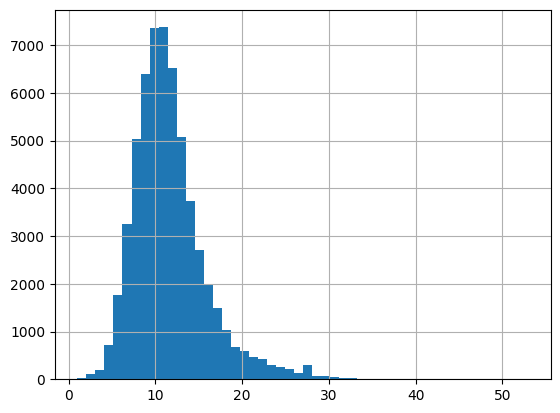

In [49]:
# How similar are the number of words in the title across sites?
news_data['title_length'] = news_data['title'].apply(lambda x: len(x.split()))
news_data['title_length'].describe()
news_data['title_length'].hist(bins=50)

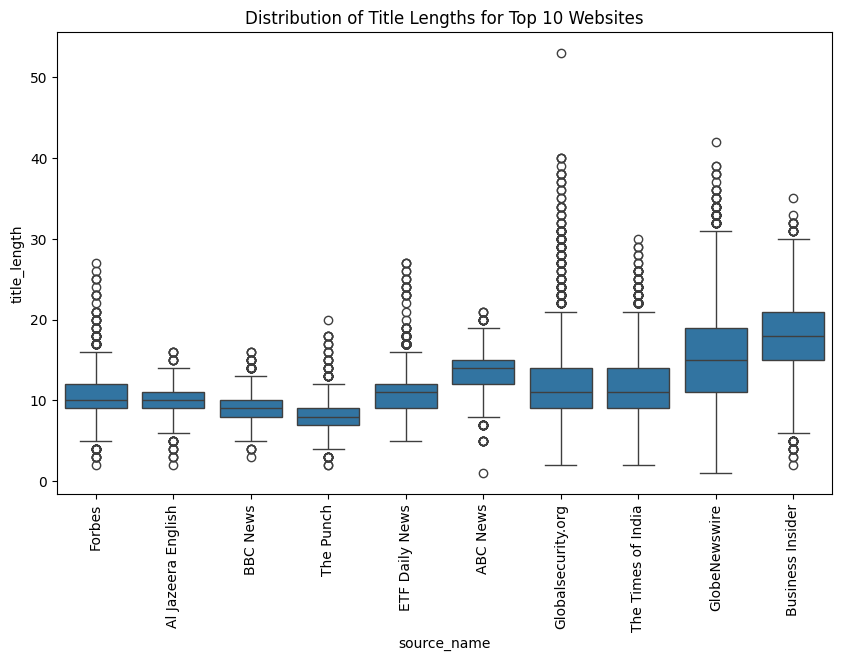

In [50]:
import seaborn as sns

def number_of_words(text):
    return len(text.split())

# How similar are the number of words in the title across sites? Check the distribution among sites
news_data['title_length'] = news_data['title'].apply(number_of_words)
# data['title_length'].describe()

# How similar are the raw message lengths across sites?
website_title_counts = news_data.groupby('source_name')['title_length'].count()

# Get the top 10 websites with the highest number of articles
large_websites = website_title_counts.nlargest(10).index

# Filter the data to include only the top websites
websites_data = news_data[news_data['source_name'].isin(large_websites)]

# Plot the distribution of message 
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_name', y='title_length', data=websites_data)
plt.xticks(rotation=90)
plt.title('Distribution of Title Lengths for Top 10 Websites')
plt.show()

ValueError: 'c' argument has 29 elements, which is inconsistent with 'x' and 'y' with size 33.

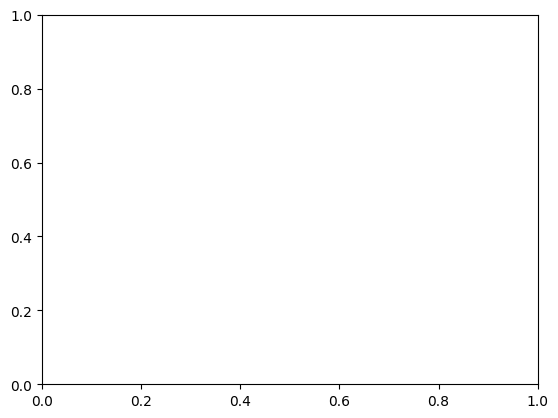

In [8]:
merged_df = news_data.merge(traffic[['Domain', 'GlobalRank']], left_on='domain', right_on='Domain', how='left')
# Drop the extra 'Domain' column
merged_df = merged_df.drop(columns='Domain')

# Rename the 'GlobalRank' column to 'global_rank'
merged_df = merged_df.rename(columns={'GlobalRank': 'global_rank'})

# The total number of reports by a website
ReportsByWebsite = merged_df['domain'].value_counts()

# Get all unique domains and their corresponding global ranking data
unique_domains = merged_df[['domain', 'global_rank']].drop_duplicates()

plt.scatter(merged_df['domain'].value_counts(), unique_domains['global_rank'], c=average_sentiment ,cmap='viridis')  
plt.xlabel('Total Number of Reports')
plt.title('2D Scatter Plot of impact of frequent news reporting')
plt.colorbar(label='Sentiment Index')
plt.ylabel('Global Ranking')
plt.xlim(0, 5000)
plt.grid(True)
plt.ylim(0, 10000)

In [7]:
merged_df.sort_values('global_rank')[['source_name', 'global_rank']].groupby('source_name').first().sort_values('global_rank').head(10)


,global_rank
source_name,
Time,137.0
Gizmodo.com,403.0
The Times of India,546.0
Phys.Org,616.0
Deadline,961.0
The Indian Express,995.0
Boing Boing,1265.0
ReadWrite,2460.0
AllAfrica - Top Africa News,2688.0
